# **TikTok Project**
**Regression Analysis**

In [ ]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


## 📘 Course 5 Final Project: Logistic Regression and Model Evaluation

This final project for Course 5 focuses on applying the concepts of **exploratory data analysis (EDA)** and **regression modeling**, specifically **logistic regression in Python**.

Logistic regression allows us to estimate the **probability of a specific outcome** while considering multiple independent variables. This technique is highly valuable in data science as it enables more robust and flexible data analysis.


### 🎯 Project Objective

The goal is to build and evaluate a logistic regression model using realistic data, demonstrating the following skills:

- Performing EDA and preparing data
- Verifying model assumptions
- Constructing and evaluating the model
- Interpreting results and communicating findings


### 📌 Project Structure

This activity is divided into **three main parts**:

**🔹 Part 1: EDA and Checking Assumptions**  
- Explore the dataset to identify key variables, missing values, outliers, and correlations  
- Clean and prepare the data to ensure logistic regression assumptions are met  

**🔹 Part 2: Model Building and Evaluation**  
- Build the logistic regression model  
- Evaluate its performance using accuracy, precision, recall, F1-score, and the confusion matrix  

**🔹 Part 3: Interpreting Model Results**  
- Analyze model coefficients to understand the effect of each feature  
- Extract actionable insights  
- Provide recommendations based on the analysis  


### 📄 Deliverable

The final deliverable includes a working logistic regression model and an **executive summary** based on the **PACE strategy questions**, written for a leadership audience. The summary focuses on practical insights and business implications derived from the model's results.


# **Build a regression model**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

### **Task 1. Imports and loading**

In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

Exploratory Data Analysis (EDA) is a critical step before constructing a logistic regression model because it helps you understand the structure, quality, and characteristics of the dataset. The main purposes of EDA include identifying and handling missing or inconsistent values, exploring the distribution of variables—especially the target variable (verified_status), detecting class imbalances, examining relationships between variables to avoid multicollinearity, and identifying potential outliers that could distort the model. EDA also allows you to gain initial insights into how independent variables might be related to the outcome, which supports effective feature selection. These steps ensure the logistic regression model is accurate, interpretable, and reliable.

### **Task 2a. Explore data with EDA**

In [ ]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Get number of rows and columns
data.shape


(19382, 12)

In [ ]:
# Get data types of columns
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [ ]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
# Check for missing values
data.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [ ]:
# Remove rows with missing values
data_clean = data.dropna()

In [ ]:
# Display first few rows after handling missing values
data_clean.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Check for duplicate rows
data_clean.duplicated().sum()


0

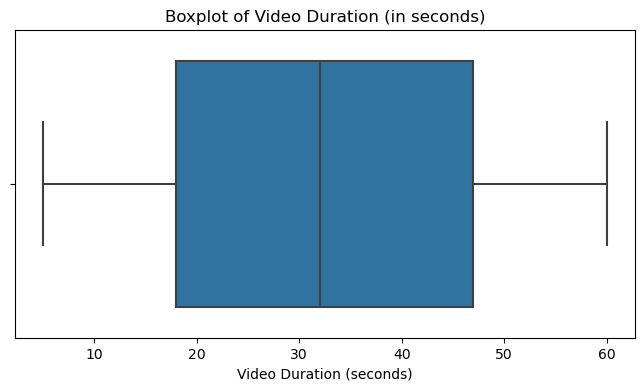

In [ ]:
# Create a boxplot to visualize distribution of `video_duration_sec`
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=data_clean['video_duration_sec'])
plt.title('Boxplot of Video Duration (in seconds)')
plt.xlabel('Video Duration (seconds)')
plt.show()




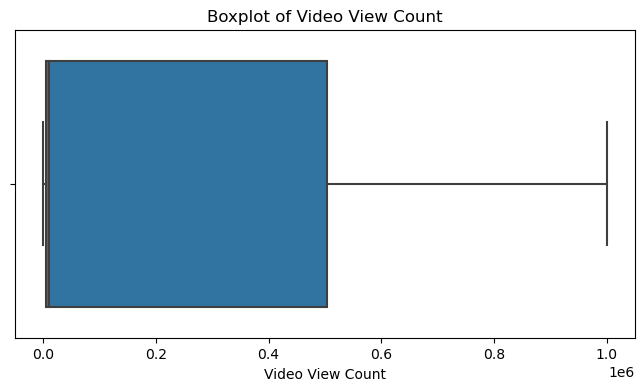

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_clean['video_view_count'])
plt.title('Boxplot of Video View Count')
plt.xlabel('Video View Count')
plt.show()




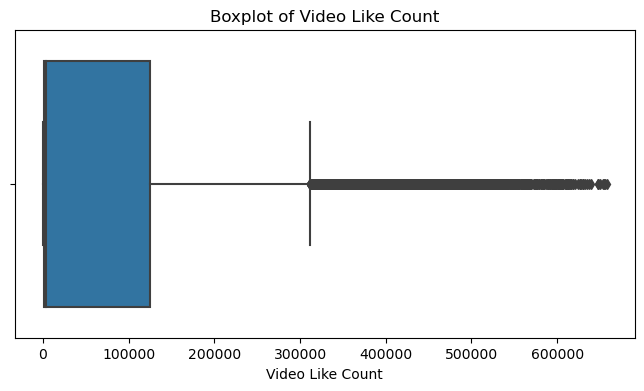

In [ ]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_clean['video_like_count'])
plt.title('Boxplot of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()




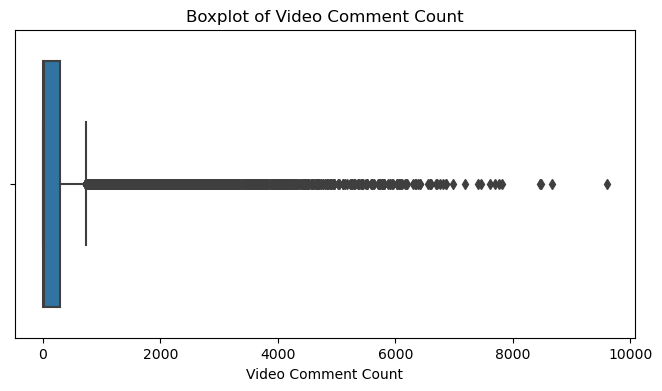

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_clean['video_comment_count'])
plt.title('Boxplot of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.show()




In [ ]:
# Function to apply IQR-based capping for outliers
def cap_outliers_iqr(df, column):
    # Calculate 1st and 3rd quartiles
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define upper limit as Q3 + 1.5 * IQR
    upper_limit = q3 + 1.5 * iqr

    # Cap values above the upper limit
    df.loc[df[column] > upper_limit, column] = upper_limit

# Apply the function to skewed variables
cap_outliers_iqr(data_clean, "video_like_count")
cap_outliers_iqr(data_clean, "video_view_count")
cap_outliers_iqr(data_clean, "video_comment_count")


Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [ ]:
# Get both counts and percentages of the target variable
class_balance = data_clean['verified_status'].value_counts().to_frame(name='count')
class_balance['proportion (%)'] = data_clean['verified_status'].value_counts(normalize=True) * 100
class_balance


,count,proportion (%)
verified_status,,
not verified,17884,93.71201
verified,1200,6.28799


Approximately 94.2% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

In [ ]:
from sklearn.utils import resample

# Step 1: Separate majority and minority classes
data_majority = data_clean[data_clean['verified_status'] == 'not verified']
data_minority = data_clean[data_clean['verified_status'] == 'verified']

# Step 2: Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                   replace=True,                  # sample with replacement
                                   n_samples=len(data_majority),  # match number of majority class
                                   random_state=0)                # reproducible results

# Step 3: Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Step 4: Display new class counts
print(data_upsampled['verified_status'].value_counts())


verified_status
not verified    17884
verified        17884
Name: count, dtype: int64


In [ ]:
# Create a new column with the length (in characters) of each transcription
data_upsampled['transcription_length'] = data_upsampled['video_transcription_text'].apply(len)

# Calculate average transcription length by verified status
avg_length_by_verified = data_upsampled.groupby('verified_status')['transcription_length'].mean()
print(avg_length_by_verified)



verified_status
not verified    89.401141
verified        84.569559
Name: transcription_length, dtype: float64


In [ ]:
# Display first few rows of dataframe after adding new column
data_upsampled.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

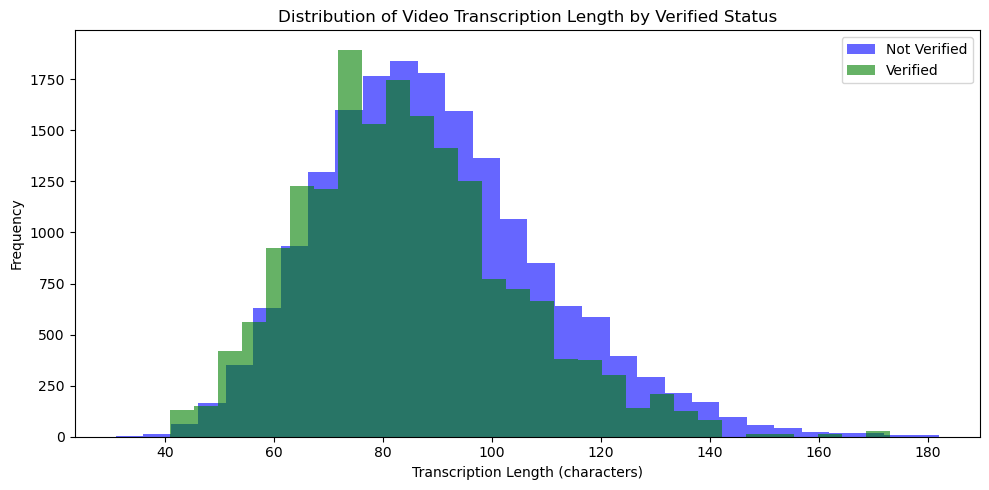

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 5))

# Histogram for unverified accounts
plt.hist(data_upsampled[data_upsampled['verified_status'] == 'not verified']['transcription_length'],
         bins=30, alpha=0.6, label='Not Verified', color='blue')

# Histogram for verified accounts
plt.hist(data_upsampled[data_upsampled['verified_status'] == 'verified']['transcription_length'],
         bins=30, alpha=0.6, label='Verified', color='green')

# Plot formatting
plt.title('Distribution of Video Transcription Length by Verified Status')
plt.xlabel('Transcription Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



### **Task 2b. Examine correlations**

In [ ]:
# Calculate correlation matrix for numeric columns only
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
transcription_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


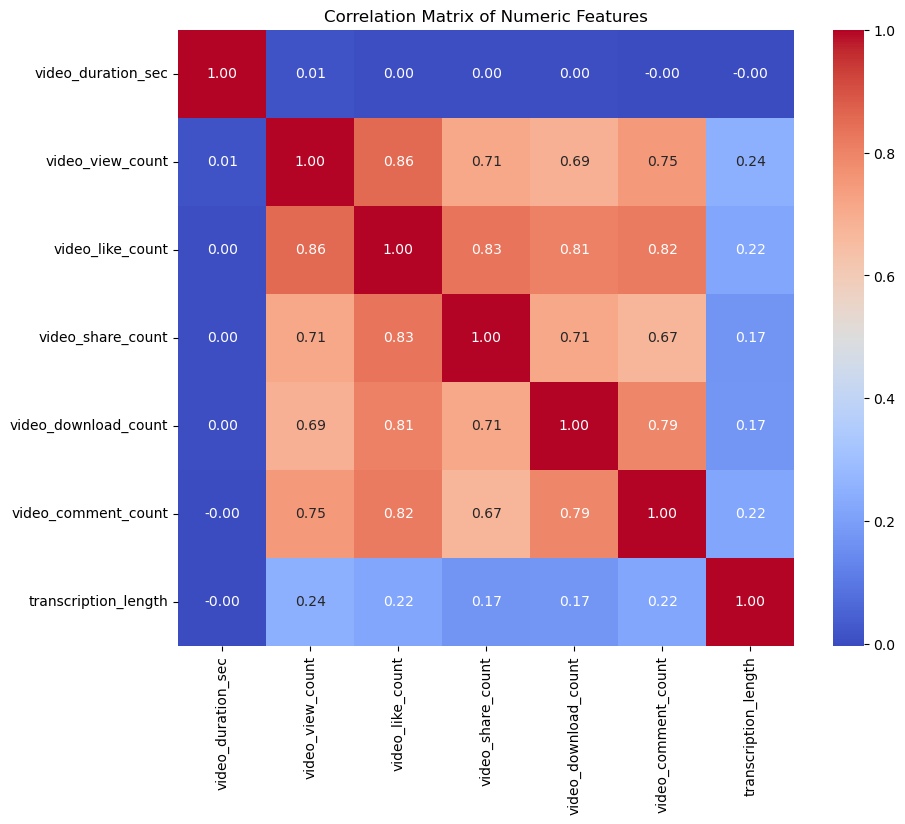

In [ ]:
# Drop irrelevant identifier columns that are not useful for modeling
data_upsampled = data_upsampled.drop(columns=['#', 'video_id'])

# Select only numeric features
numeric_cols = data_upsampled.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()




The heatmap shows that several video performance metrics are strongly correlated. In particular, `video_view_count` and `video_like_count` have a high correlation coefficient of **0.86**, indicating a strong positive linear relationship. Additionally, `video_like_count` is also strongly correlated with `video_share_count`, `video_download_count`, and `video_comment_count`, all with coefficients above **0.79**.

These strong correlations suggest potential multicollinearity if multiple interaction-related features are included in the model. To address this and meet the logistic regression assumption of no severe multicollinearity, it would be appropriate to exclude some of these variables. For example, the model can retain `video_view_count` as a representative feature and drop `video_like_count`, which is highly correlated with several other metrics.


## **PACE: Construct**


### **Task 3a. Select variables**

In [ ]:
# Select outcome variable (target)
y = data_upsampled["verified_status"]


In [ ]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()


,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [ ]:
# Get shape of each training and testing set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (26826, 7)
X_test shape: (8942, 7)
y_train shape: (26826,)
y_test shape: (8942,)


In [ ]:
Notes:After splitting the data, the training set contains 26,826 records and the testing set contains 8,942 records, for a total of 35,768 observations. This total matches the upsampled dataset, which includes an equal number of verified and unverified accounts. Each feature set, X_train and X_test, includes 7 predictor variables: video_duration_sec, claim_status, author_ban_status, video_view_count, video_share_count, video_download_count, and video_comment_count. These results confirm that the data has been successfully split and is ready for the next step, which involves encoding the categorical variables before training the logistic regression model.

### **Task 3c. Encode variables**

In [ ]:
# Check data types
X_train.dtypes


video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [ ]:
# Get unique values in `claim_status`
X_train["claim_status"].unique()




array(['opinion', 'claim'], dtype=object)

In [ ]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()



array(['active', 'under review', 'banned'], dtype=object)

In [ ]:
# Select the training features that need to be encoded
X_train_categorical = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_categorical.head()



,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Set up one-hot encoder
encoder = OneHotEncoder(drop='first', sparse_output=False) # drop='first' to avoid multicollinearity



In [ ]:
# Fit and transform the training categorical features
X_train_encoded = encoder.fit_transform(X_train_categorical)



In [ ]:
# Get feature names from encoder
encoded_feature_names = encoder.get_feature_names_out(X_train_categorical.columns)
# Display encoded feature names
print(encoded_feature_names)


['claim_status_opinion' 'author_ban_status_banned'
 'author_ban_status_under review']


In [ ]:
# Display first few rows of encoded training features
X_train_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()




,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Drop categorical columns from X_train
X_train_dropped = X_train.drop(columns=["claim_status", "author_ban_status"])

# Display first few rows
X_train_dropped.head()



,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [ ]:
# Concatenate `X_train_dropped` and `X_train_encoded_df` to form `X_train_final`
X_train_final = pd.concat([X_train_dropped.reset_index(drop=True),
                           X_train_encoded_df.reset_index(drop=True)], axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Check data type of outcome variable
y_train.dtype



dtype('O')

In [ ]:
# Get unique values of outcome variable
y_train.unique()



array(['verified', 'not verified'], dtype=object)

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)



In [ ]:
# Encode the training outcome variable
# Notes:
#   - Using `.to_frame()` to ensure the encoder receives a 2D input with column names (as expected)
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.to_frame()).ravel()

# Display the encoded training outcome variable
y_train_final


array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)




## **PACE: Execute**



### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [ ]:
# Select the testing features that need to be encoded
X_test_categorical = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_categorical.head()



,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [ ]:
# Encode the testing categorical features using the encoder trained on training data
X_test_encoded = encoder.transform(X_test_categorical)


# Display first few rows of encoded testing features
X_test_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
# Convert encoded array into a DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Drop original categorical columns from X_test
X_test_dropped = X_test.drop(columns=["claim_status", "author_ban_status"])

# Display first few rows
X_test_dropped.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [ ]:
# Concatenate numeric and encoded categorical features
X_test_final = pd.concat([X_test_dropped.reset_index(drop=True),
                          X_test_encoded_df.reset_index(drop=True)], axis=1)

# Display first few rows
X_test_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)


In [ ]:
# Display the predictions on the encoded testing set
y_pred


array([1., 1., 0., ..., 1., 0., 1.])

In [ ]:
# Display the true labels of the testing set
y_test


21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Using `.to_frame()` to ensure the encoder receives a 2D input with column names (as expected)
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.to_frame()).ravel()

# Display the encoded testing outcome variable
y_test_final


array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_train_final shape:", y_train_final.shape)
print("y_test_final shape:", y_test_final.shape)




X_train_final shape: (26826, 8)
X_test_final shape: (8942, 8)
y_train_final shape: (26826,)
y_test_final shape: (8942,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

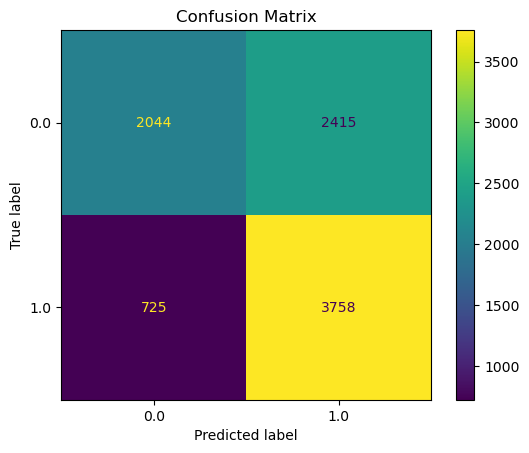

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title("Confusion Matrix")
plt.show()


###Confusion Matrix – Interpretation

This confusion matrix shows the performance of the logistic regression model in predicting whether a TikTok user is verified or not based on video-level features:


- **True Negatives (2044):** Correctly predicted unverified accounts  
- **False Positives (2415):** Predicted as verified, but actually unverified  
- **False Negatives (725):** Predicted as unverified, but actually verified  
- **True Positives (3758):** Correctly predicted verified accounts



In [ ]:
# Create classification report for logistic regression model
target_labels = ["not verified", "verified"]
print("Classification Report:\n")
print(classification_report(y_test_final, y_pred, target_names=target_labels))



Classification Report:

              precision    recall  f1-score   support

not verified       0.74      0.46      0.57      4459
    verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



In [ ]:
#### Key Metrics:
- **Accuracy:** 65% → Overall correct predictions
- **Precision (verified):** ~61% → Of all predicted verified users, 61% were correct
- **Recall (verified):** ~84% → Of all actual verified users, 84% were correctly identified

**Insight:**
The model is particularly effective at identifying verified accounts (high recall), which is useful if the goal is to prioritize this type of user for further analysis or claim classification.

### **Task 4c. Interpret model coefficients**

In [ ]:
# Get the feature names from the training data
feature_names = X_train_final.columns

# Get the model coefficients (log-odds)
coefficients = log_clf.coef_[0]

# Place into a DataFrame for readability
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Log-Odds Coefficient": coefficients
})

# Display the coefficients
coef_df



,Feature,Log-Odds Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


### **Task 4d. Conclusion**



The dataset included several correlated features, which could lead to multicollinearity. To address this, we dropped video_like_count before building the model.

The logistic regression model estimated that each additional second in video duration increases the log-odds of the user being verified by approximately 0.009, making it the most relevant feature.

Other features, such as video_share_count and video_comment_count, had relatively small coefficients, indicating weak associations with the verified status.

The model achieved an accuracy of 65%, with precision of 61% and recall of 84% for verified users. While precision is moderate, the high recall shows the model is effective at identifying verified accounts.

Overall, the model had acceptable predictive performance. It demonstrates that video-level features can help estimate the likelihood of verification status, even if most features show only modest influence individually.